# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [13]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


****
## Preliminary Analysis

In [11]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/TarjaniAgrawal/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


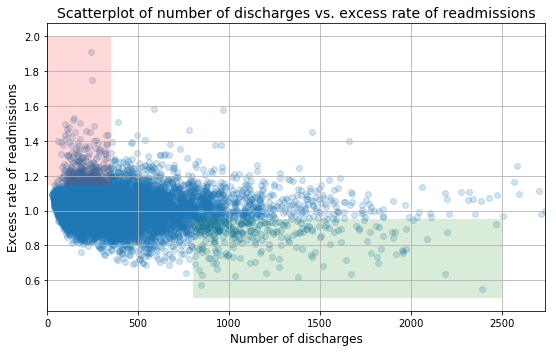

In [12]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

#Your turn

# Do you agree with the above analysis and recommendations? Why or why not?

The idea of constructing two groups of hospitals based of number of discharges and using that as indication of size of hospitals is quite convincing. Also, the inference from the graph that rate of readmissions is trending down with increasing number of discharges is observable. I agree with the points made under initial observations, however the graph in itself could have been more explainatory (See below). 

I do not understand where the statistics came from because there is no code to calculate any of those values above. So I do not agree with those values unless work is shown. Also, the conclusions drawn from initial observations and statistics seem to be completely far fetched as no statistical tests for significance have been performed on the data. 

The data needs to be analysed in more detail to conclude the recommendations made. 

# To see if excess readmission ratio is dependent on no of discharges.

First step is read the data again and get rid of columns which are not needed.

In [191]:
new_data = hospital_read_df[['Number of Discharges', 'Excess Readmission Ratio']]
new_data = new_data[new_data['Number of Discharges'] != 'Not Available']
new_data['Number of Discharges'] = pd.to_numeric(new_data['Number of Discharges'])
new_data = new_data.sort_values('Number of Discharges').reset_index()
new_data.head()

,index,Number of Discharges,Excess Readmission Ratio
0,16857,0,NaN
1,14582,0,NaN
2,15606,0,NaN
3,15615,0,NaN
4,14551,0,NaN


In [155]:
#First 80 values are 0 and have NaNs for Excess Readmission Ratio
new_data1 = new_data.iloc[81:-1]
new_data1.head()

,index,Number of Discharges,Excess Readmission Ratio
81,1832,25,1.0914
82,1699,27,1.0961
83,1774,28,1.0934
84,1853,29,1.0908
85,1290,30,1.1123


Next step is to divide the data into two categories:

1. Big Hospitals : Number of Discharges  > 1000
2. Small Hospitals : Number of Discharges  < 100

In [159]:
data = new_data1
sml_hos = data[data['Number of Discharges'] < 100]
big_hos = data[data['Number of Discharges'] > 1000]

Calculated the means of two sets and it is same as reported means. Also found the p-value and the means are significantly different at α = .01

In [161]:
#Calculate the mean of both the sets 
sml_mean = sml_hos['Excess Readmission Ratio'].mean()
big_mean = big_hos['Excess Readmission Ratio'].mean()
print(sml_mean, big_mean)


1.0226183501683506 0.9788558441558446


In [195]:
import scipy.stats as stats
stats.ttest_ind(sml_hos['Excess Readmission Ratio'], big_hos['Excess Readmission Ratio'], equal_var = False)

Ttest_indResult(statistic=7.5276229869594005, pvalue=2.1410788153732896e-13)

Calculated the probability of excess readmission ratio > 1 for both the sets and found it to be same as reported. 

In [163]:
#probability of excess readmission ratio for both the sets
p_sml = sum(sml_hos['Excess Readmission Ratio'] > 1)/ len(sml_hos) 
p_big = sum(big_hos['Excess Readmission Ratio'] > 1)/ len(big_hos)
print(p_sml *100, p_big *100)

63.2154882155 44.5887445887


# To test for significant difference in probabilities of excess readmission ratio > 1 for both sets


**What are the null and alternate hypotheses?**

Null Hypothesis : The probability of finding excess readmission ratio > 1 for small and big hospitals is not different

Test Hypothesis :The probability of finding excess readmission ratio > 1 for small and big hospitals is significantly different

In [175]:
print(len(sml_hos) ,len(big_hos))

1188 462


In [176]:
group1 = sml_hos['Excess Readmission Ratio']
group2 = big_hos['Excess Readmission Ratio']

**Step1:** Define test statistic which is difference in the probabilities and also calculate the actual value from the given sample data

In [177]:
def TestStatistic(data):
    group1, group2 = data
    p_group1 = (sum(group1 > 1)/ len(group1)) * 100
    p_group2 = (sum(group2 > 1)/ len(group2)) * 100
    test_stat = abs(p_group1 - p_group2)
    return test_stat
actual = TestStatistic((group1, group2))
actual

18.626743626743625

**Step2:** Assume that there is no difference in the probabilities and combine all the values to form a pool data

In [178]:
import numpy as np
n,m = len(group1), len(group2)
pool = np.hstack((group1, group2))
def RunModel():
    np.random.shuffle(pool)
    data = pool[:n], pool[n:]
    return data

**Step3:** Stimulate the experiment 10000 times to get the sampling distribution of sample probabilities difference and plot it.

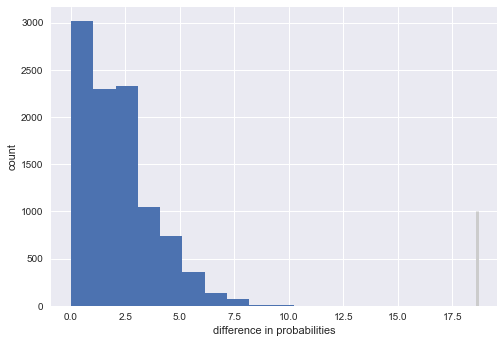

In [185]:
import matplotlib.pyplot as plt
test_stats = np.array([TestStatistic(RunModel()) for i in range(10000)])
test_stats.shape
plt.vlines(actual, 0, 1000, linewidth=3, color='0.8')
plt.hist(test_stats)
plt.xlabel('difference in probabilities')
plt.ylabel('count')
plt.show()
None

**Step4:** To calculate the p-value of getting diff in probabilities as extreme as actual or more than actual.

**Compute margin of error, 99% confidence interval, and p-value.**

In [192]:
conf_int = np.percentile(test_stats, [.5, 99.5])
print(conf_int)

[ 0.01202501  7.52765753]


In [193]:
marginoferror = 2 * test_stats.std()
print(marginoferror)

3.24713340916


In [194]:
p_value = sum(test_stats >= actual)/len(test_stats)
print(p_value)

0.0


The p-value of null hypothesis being true is ~0%. Which means that there is no chance of seeing the difference in probabilties as extreme as  the actual difference in probabilities observed. This is very low probability of something happening which suggests that it can not be just due to chance. Therefore, we can reject the null hypothesis and consider the alternate hypothesis.

**There is significant difference in the probabilities of finding a excess readmission ratio > 1 in small vs big hospitals.**


**Now next I plotted and calculated the correlation for number of discharges and excess readmission ratio only for small hospitals and big hospitals.** 

It was found that person r shows much higher negative value for small hospitals as compared to big hospitals. This indicates that negative correlation of hospital size(number of discharges) to excess readmission ratio is higher in small hospitals than in big hospitals. 

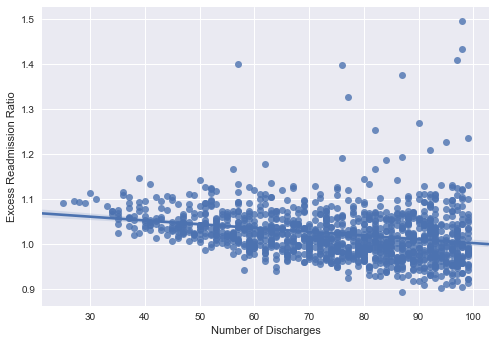

(-0.2446355003347625, 1.1955927845532596e-17)

In [196]:
import seaborn as sns
sns.regplot(x='Number of Discharges', y= 'Excess Readmission Ratio', data = sml_hos)
plt.show()
stats.pearsonr(sml_hos['Number of Discharges'], sml_hos['Excess Readmission Ratio'])

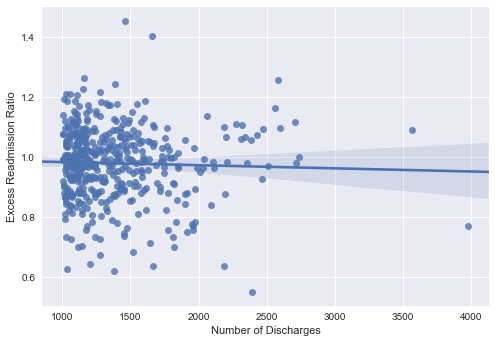

(-0.03372383956466056, 0.46961323181817483)

In [197]:
import seaborn as sns
sns.regplot(x='Number of Discharges', y= 'Excess Readmission Ratio', data = big_hos)
plt.show()
stats.pearsonr(big_hos['Number of Discharges'], big_hos['Excess Readmission Ratio'])

# Discuss statistical significance and practical significance.  Do they differ here? How does this change your recommendation to the client?

The data shows that both means and probabilities of Excess readmission ratio > 1 are statistically significantly different when we consider hospital size. Though the different in means is not huge, still we find very low p_value making it highly significantly. This statistical analysis clearly indicates that hospital size affects the excess readmission ratio. 

However still the person correlation between hospital size and excess readmission ratio remains to be negative for both small and big hospitals. This could mean that just increasing the size of hospital will not probability decrease the readmission.

For practical significance and making recommendations to the client. I would like to analysis the data further to find any other cofounding factors that might affect the trend that we are seeing. And recommendation accordingly. 


# Look at the scatterplot above. What are the advantages and disadvantages of using this plot to convey information? Construct another plot that conveys the same information in a more direct manner.

Scatter plots are used to visualize the relationship between variables. However, in this case the scatter plot seems to be clustered due to too many data points at the same place. Also, I dont quite understand how the limits for the shaded regions in the plot are defined and it does not quite convey what is being tried to infer. 

A much better way would be to construct a joint plot of scatter with hexagonal bins along with the histogram as shown below. 

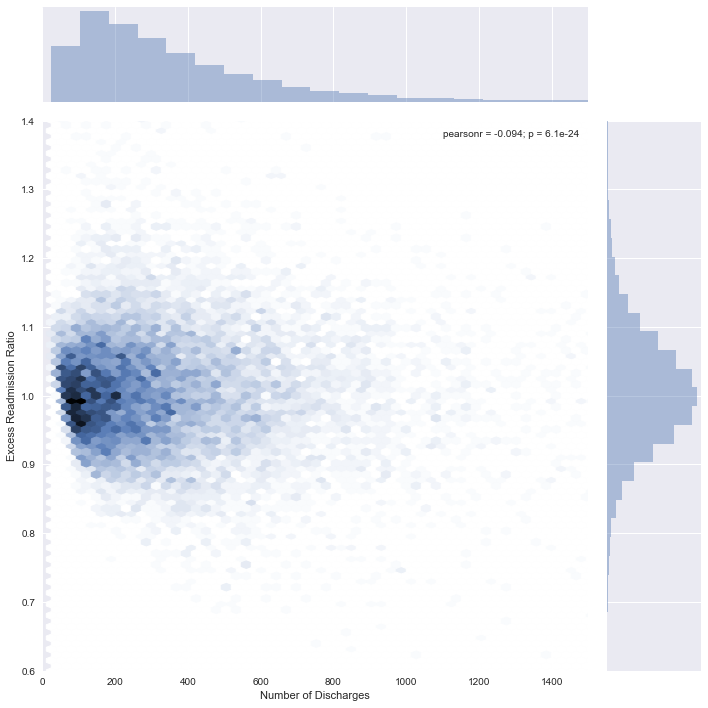

In [204]:
sns.jointplot(new_data1['Number of Discharges'] , new_data1['Excess Readmission Ratio'], xlim=(0,1500),ylim=(0.6,1.4),kind="hex",size=10)
plt.show()